In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [6]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [7]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

In [8]:
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
1.1869     1
1.1752     1
1.1770     1
1.1750     1
1.1821     1
Name: count, Length: 3528, dtype: int64

In [9]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [10]:
euro_to_dollar.loc[:, 'US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [11]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 132.1+ KB


In [12]:
euro_to_dollar.loc[:, 'rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

In [13]:
title_text = 'Euro-USD rate peaked at 1.59 during 2007-2008\'s financial crisis'
subtitle_text = 'Euro-USD exchange rates between 2006 and 2010'

In [43]:
euro_to_dollar_2006_2010 = euro_to_dollar[(euro_to_dollar['Time'] >= '2006-01-01') & (euro_to_dollar['Time'] < '2010-01-01')]
euro_to_dollar_2007_2009 = euro_to_dollar[(euro_to_dollar['Time'] >= '2007-01-01') & (euro_to_dollar['Time'] < '2009-01-01')]

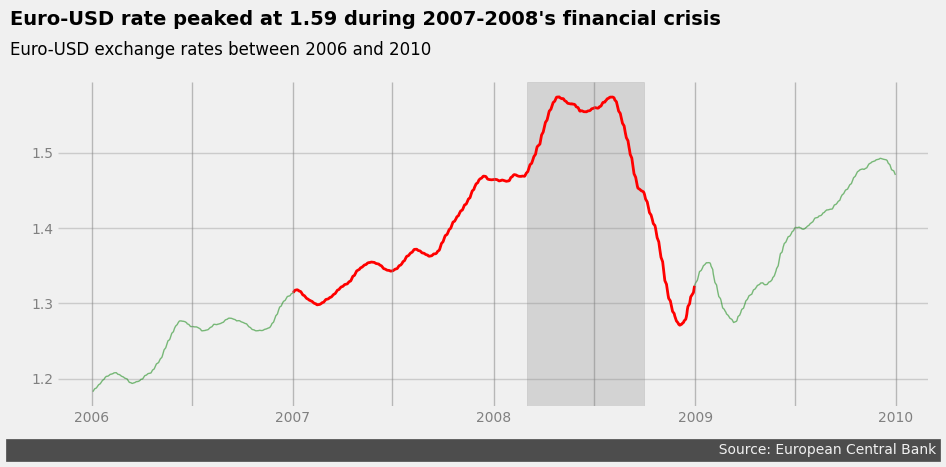

In [101]:
fig, ax = plt.subplots(figsize=(10, 4))
style.use('fivethirtyeight')
ax.plot(euro_to_dollar_2006_2010['Time'],
         euro_to_dollar_2006_2010['rolling_mean'],
         color='green',
         linewidth=1,
         alpha=0.5)
ax.plot(euro_to_dollar_2007_2009['Time'],
        euro_to_dollar_2007_2009['rolling_mean'],
        color='red',
        linewidth=2)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlim([datetime(2005, 11, 1), datetime(2010, 3, 1)])
grid_dates = pd.date_range(start='2006-01-01', end='2010-01-01', freq='6MS')
for date in grid_dates:
    ax.axvline(x=date, color='grey', linewidth=1, alpha=0.5)
tick_dates = pd.date_range(start='2006-01-01', end='2010-01-01', freq='12MS')
ax.set_xticks(tick_dates)
ax.set_xticklabels([date.strftime('%Y') for date in tick_dates])
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.tick_params(labelsize=10, labelcolor='grey')
ax.grid(axis='x', visible=False)
ax.axvspan(datetime(2008, 3, 1), datetime(2008, 10, 1), color='grey', alpha=0.25)
ax.text(13000.0, 1.67, title_text, weight='bold')
ax.text(13000.0, 1.63, subtitle_text, size=12)
ax.text(13000.0, 1.1, ' '*162 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)
plt.show()